In [2]:
import os
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from tqdm import tqdm
from torch import optim
# from utils import *
# from modules import UNet
import logging
# from torch.utils.tensorboard import SummaryWriter
import logging

# One step noise adding 


$$ 
\sqrt{\bar{\alpha}}x_0 + \sqrt(1-\bar{\alpha_t})\epsilon
$$


In [3]:
logging.basicConfig(format="%(asctime)s - %(levelname)s: %(message)s", level=logging.INFO, datefmt="%I:%M:%S")


class Diffusion(nn.Module): # Diffusion process
    def __init__(self,noise_steps, beta_start, beta_end,noise_scheduler="linear",device = "cpu"):
        super(Diffusion, self).__init__()
    
        self.noise_steps = noise_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        # self.img_size = img_size
        self.device = device
        
        self.beta = self.prepare_noise_schedule(type=noise_scheduler).to(device) # noise schedule
        self.alpha = 1. - self.beta
        print(self.beta.shape)
        self.alpha_hat = torch.cumprod(self.alpha, dim=0) # shape = [n_timestep]


    # linear schedule from DDPM
    # can also easily switch to cosine schedule proposed by openAI
    def prepare_noise_schedule(self, type):
        if type == "linear":  
            return torch.linspace(self.beta_start, self.beta_end, self.noise_steps) # linear schedule
        elif type == "cosine":
            t = torch.linspace(self.beta_start, self.beta_end, self.noise_stpes)
            return self.cosine_schedule(t, self.noise_steps)
        else: 
            raise ValueError("Input should be \"linear\" or \"cosine\"")

            
    
    def cosine_schedule(self, t, steps, s=0.008): # cosine scheduler 
        return torch.cos((t / steps + s) / (1 + s) * 0.5 * torch.pi) ** 2
        
    
    # one step add noise 
    # @staticmethod # the function can be used directly as Diffuse.method without the necessity to call the Diffuse instance
    def noise_add(self, x, t): 
        """adding noise (will have to operate on both node embedding and edge attributes)

        Args:
            x (_type_): data
            t (_type_): time step 
            
        Return: 
            noisy latent data, noise
        """
        # sqrt alpha hat 
        feat_dim = x.shape[1]
        # sqrt_alpha_hat = torch.full((x.shape[0],),torch.sqrt(self.alpha_hat[t])) # two dimensional 
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])
        sqrt_one_minus_alpha_hat = torch.sqrt(1-self.alpha_hat[t])
        # sqrt_one_minus_alpha_hat = torch.full((x.shape[0],),torch.sqrt(1 - self.alpha_hat[t])) # two dimensional  
        epsilon = torch.randn_like(x)
        # print("sqrt_alpha_hat: ", sqrt_alpha_hat.shape)
        # print("sqrt_one_minus: ", sqrt_one_minus_alpha_hat.shape)
        # print("x: ", x.shape)
        x_noised = sqrt_alpha_hat*x + sqrt_one_minus_alpha_hat*epsilon
        return x_noised, epsilon 
    
    # sampling 
    @torch.no_grad()
    def sampling(self, model, n_nodes, n_latent):
        
        """sampling function 

        Args:
            n_nodes (_type_): number of nodes in the function 
            n_latent (_type_): latent space representation for nodes 
            
        """
        
        logging.info(f"Sampling new molecules....")
        x = torch.randn((n_nodes, n_latent)).to(self.device)
        # for i in tqdm(reversed(range(1, self.noise_steps)), position=0):
        z = torch.randn(())
        raise NotImplementedError("not yet finished")
    
    
            
            
            
            
        
    def training():
        """
        Train the decoder
        
        """
        raise NotImplementedError("not yet")
    
    
    

In [4]:
noise_steps = 100
beta_start = 0.0001
beta_end = 0.02
diffuse = Diffusion(noise_steps, beta_start, beta_end)


torch.Size([100])


In [5]:
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import QM9
data = QM9(root='./practice_data', transform=None)
dataloader = DataLoader(data, batch_size=32, shuffle=True) 
dummy = next(iter(dataloader))
dummy.keys()

['edge_attr',
 'pos',
 'name',
 'y',
 'idx',
 'x',
 'ptr',
 'z',
 'edge_index',
 'batch']

In [15]:
# noised = diffuse.noise_add(dummy.x, 10)
# x = dummy.x
print(dummy.x[0,:5])

# Embedding 
embedding = nn.Embedding(5, 7)

ed = embedding(dummy.x[:,:5].to(dtype=torch.long))
print(ed.shape)
print(ed[0])

# print("noised: ", noised)

tensor([0., 1., 0., 0., 0.])
torch.Size([547, 5, 7])
tensor([[ 0.5606, -1.4089, -1.7154, -0.5979, -0.0274, -0.7844, -0.0837],
        [-1.8400, -1.5805,  0.4298, -0.5468, -0.9429,  0.1285,  0.0967],
        [ 0.5606, -1.4089, -1.7154, -0.5979, -0.0274, -0.7844, -0.0837],
        [ 0.5606, -1.4089, -1.7154, -0.5979, -0.0274, -0.7844, -0.0837],
        [ 0.5606, -1.4089, -1.7154, -0.5979, -0.0274, -0.7844, -0.0837]],
       grad_fn=<SelectBackward0>)


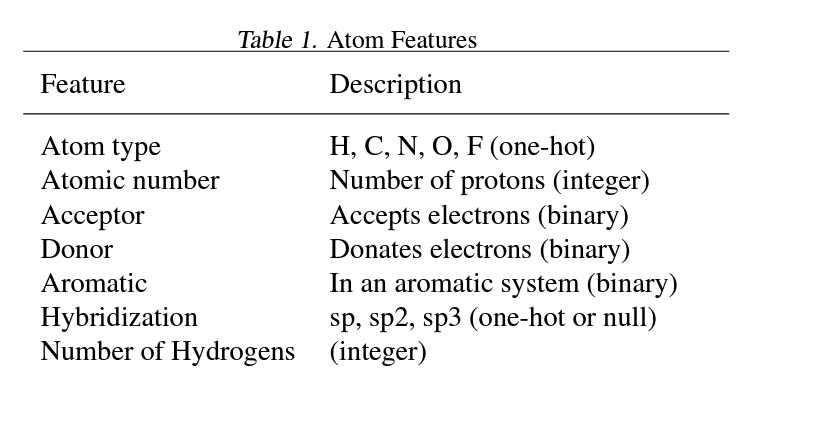

In [53]:
import torch
import torch.nn as nn

# Example categorical data mapping: "cat": 0, "dog": 1, "bird": 2
num_categories = 4  # Number of unique categories
embedding_dim = 5  # Size of the embedding vector

embedding_layer = nn.Embedding(num_embeddings=num_categories, embedding_dim=embedding_dim)

# Example: Get embeddings for "cat" and "dog"
category_ids = torch.tensor([0, 1])  # Tensor containing integer IDs

embeddings = embedding_layer(category_ids)
print(embeddings)

tensor([[-1.0874, -0.5447,  0.8066,  0.7730,  0.7387],
        [ 0.9530, -1.3328,  0.3867,  0.9430,  1.4207]],
       grad_fn=<EmbeddingBackward0>)


In [14]:
n, d, m = 3, 5, 7
embedding = nn.Embedding(n, d, max_norm=True)
W = torch.randn((m, d), requires_grad=True)
idx = torch.tensor([1, 2])
a = embedding.weight.clone() @ W.t()  # weight must be cloned for this to be differentiable
b = embedding(idx) @ W.t()  # modifies weight in-place
out = (a.unsqueeze(0) + b.unsqueeze(1))
loss = out.sigmoid().prod()
loss.backward()